In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew


In [3]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
df_train_id = df_train['Id']
df_test_id = df_test['Id']

In [4]:




df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

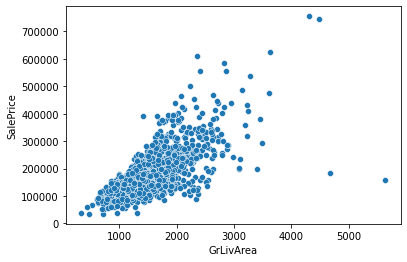

In [5]:
# As the dataset creator stated: "there are outliers in the data" so let us remove them

sns.scatterplot(data = df_train, x =  'GrLivArea', y = 'SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

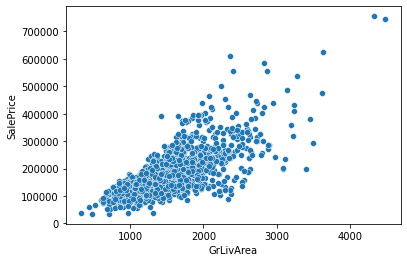

In [6]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
sns.scatterplot(data = df_train, x =  'GrLivArea', y = 'SalePrice')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

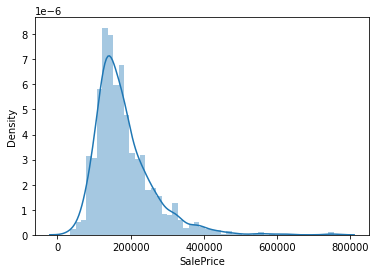

In [7]:
# what is the distribution of the target variable?

sns.distplot(df_train['SalePrice'],kde=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

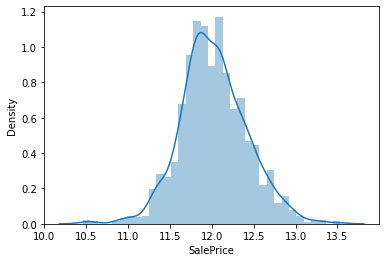

In [8]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'],kde=True)

In [9]:
# Now that outliers and target are prepared, going to look at feature inputing and dropping

ntrain = df_train.shape[0]
ntest = df_test.shape[0]

y_train = df_train['SalePrice'].values

all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [10]:
df_train.isnull().sum().sort_values()

MSSubClass          0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1177
Alley            1367
MiscFeature      1404
PoolQC           1452
Length: 80, dtype: int64

In [11]:
(100*df_train.isnull().sum()/len(df_train)).sort_values()

MSSubClass        0.000000
TotalBsmtSF       0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
                   ...    
FireplaceQu      47.325103
Fence            80.727023
Alley            93.758573
MiscFeature      96.296296
PoolQC           99.588477
Length: 80, dtype: float64

In [12]:
(100*df_train.isnull().sum()/len(df_train)).sort_values()

MSSubClass        0.000000
TotalBsmtSF       0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
                   ...    
FireplaceQu      47.325103
Fence            80.727023
Alley            93.758573
MiscFeature      96.296296
PoolQC           99.588477
Length: 80, dtype: float64

In [13]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [14]:
percent_nan = percent_missing(df_train)
percent_nan

Electrical       0.068587
MasVnrType       0.548697
MasVnrArea       0.548697
BsmtQual         2.537723
BsmtCond         2.537723
BsmtFinType1     2.537723
BsmtExposure     2.606310
BsmtFinType2     2.606310
GarageCond       5.555556
GarageQual       5.555556
GarageFinish     5.555556
GarageType       5.555556
GarageYrBlt      5.555556
LotFrontage     17.764060
FireplaceQu     47.325103
Fence           80.727023
Alley           93.758573
MiscFeature     96.296296
PoolQC          99.588477
dtype: float64

<AxesSubplot:>

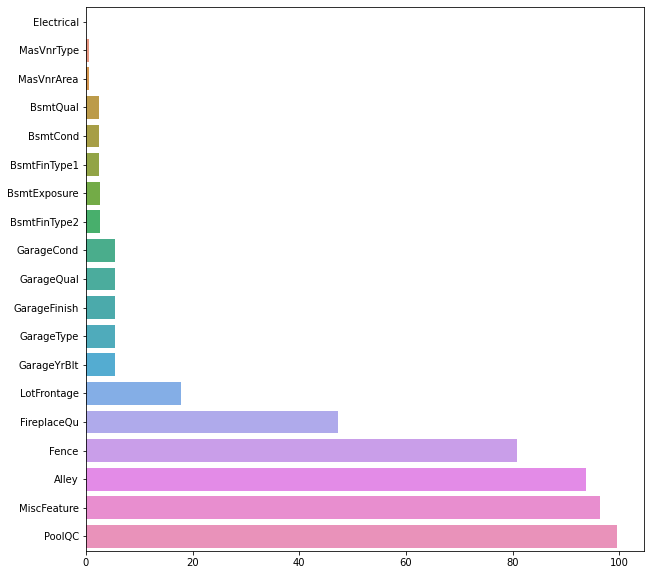

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(y=percent_nan.index,x=percent_nan)

(0.0, 1.0)

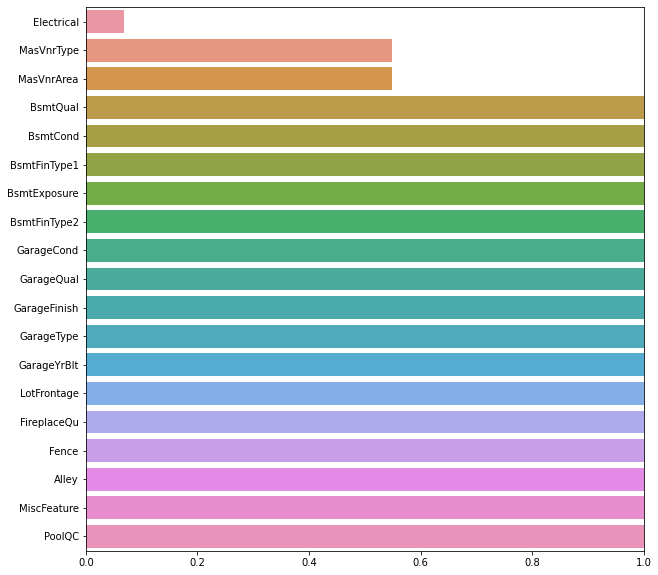

In [16]:
plt.figure(figsize=(10,10))
sns.barplot(x=percent_nan,y=percent_nan.index)
plt.xlim(0,1)

<AxesSubplot:>

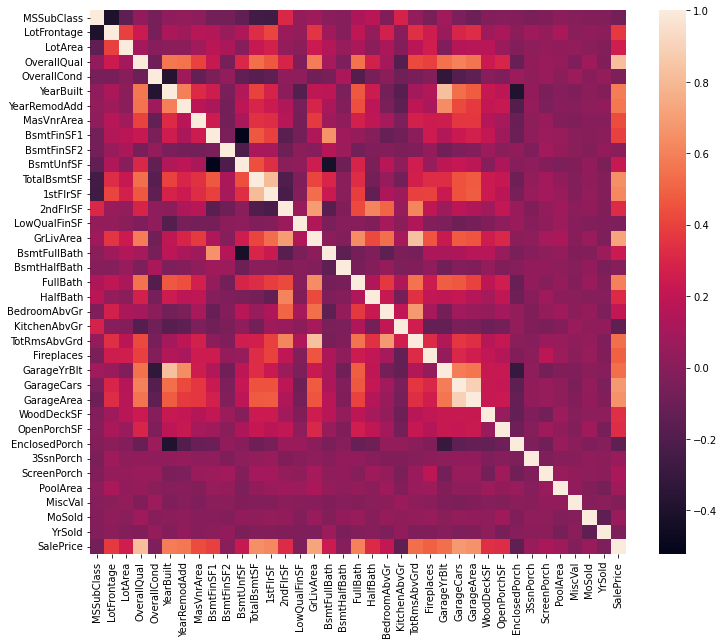

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df_train.corr())

In [18]:
# Since data description says NA in most cases means the house has no such feature, I am going to inpute all with categorical features with 'None'


In [19]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','MasVnrType','MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [20]:
percent_nan = percent_missing(all_data)


(0.0, 1.0)

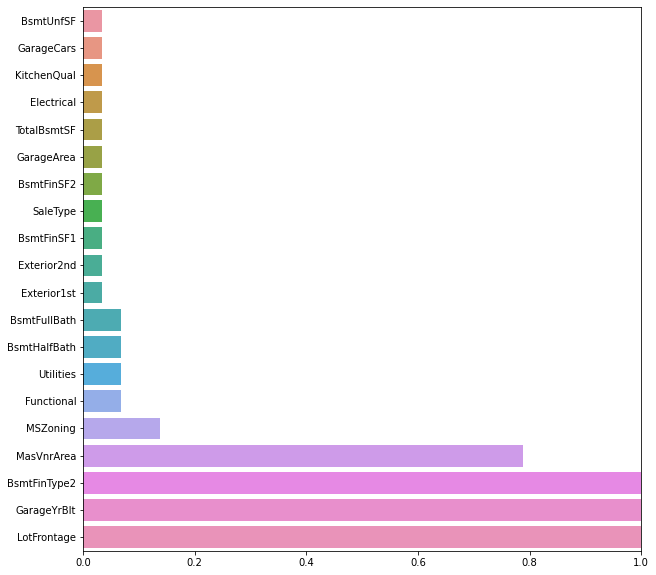

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(y=percent_nan.index,x=percent_nan)
plt.xlim(0,1)

In [22]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [23]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

In [24]:
percent_nan = percent_missing(all_data)
percent_missing(all_data)

Exterior1st     0.034282
Exterior2nd     0.034282
Electrical      0.034282
KitchenQual     0.034282
SaleType        0.034282
Utilities       0.068564
Functional      0.068564
MSZoning        0.137127
BsmtFinType2    2.742544
dtype: float64

In [25]:
all_data = all_data.drop(['Utilities'], axis=1)

In [26]:
all_data["Functional"] = all_data["Functional"].fillna("type")

In [27]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [28]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [29]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [30]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [31]:
#Looks like all null values are now filled in
all_data.OverallCond

0       5
1       8
2       5
3       5
4       5
       ..
2912    7
2913    5
2914    7
2915    5
2916    5
Name: OverallCond, Length: 2917, dtype: int64

In [32]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [33]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [34]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [35]:
from scipy import stats
from scipy.stats import norm, skew 

In [36]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [37]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [38]:

all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [39]:
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)


(1458, 220)
(1459, 220)
(1458,)


In [40]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, ElasticNet
base_lasso = Lasso()
base_EN = ElasticNet()
from sklearn.model_selection import GridSearchCV, cross_val_score


In [41]:
rscaler = RobustScaler()
scaled_X_train = rscaler.fit_transform(X_train)
scaled_X_test = rscaler.transform(X_test)

In [42]:


for model in [base_lasso,base_EN]: 
    cv = cross_val_score(model,scaled_X_train,y_train,cv=10)
    print(model)
    print(cv)
    print(cv.mean())
    print()

Lasso()
[0.09805606 0.10613506 0.11006872 0.14337389 0.13605443 0.01463796
 0.07319223 0.05462577 0.05355544 0.14634723]
0.09360467902279146

ElasticNet()
[0.09655487 0.1077519  0.11548165 0.15014833 0.1432698  0.00998565
 0.07168193 0.05216669 0.05193927 0.15275114]
0.09517312186556771



In [43]:
grid_lasso = GridSearchCV(base_lasso, param_grid = {'alpha':[0.0005,0.001,0.01,0.1,1,5,10,50]}, cv = 10,verbose = 1)
grid_EN = GridSearchCV( base_EN,{'alpha':[0.0005,0.001,0.01,0.1,1,5,10,50],'l1_ratio':[0.01,0.1,0.5,0.75,0.99]}, cv=
                       10,verbose = 1)

In [44]:
# grid_lasso.fit(scaled_X_train,y_train)
grid_EN.fit(scaled_X_train,y_train)


Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.1, 1, 5, 10, 50],
                         'l1_ratio': [0.01, 0.1, 0.5, 0.75, 0.99]},
             verbose=1)

In [45]:
# best_params = grid_model.best_estimator_.get_params()
# best_params

In [46]:
# predictions = np.expm1(grid_lasso.predict(scaled_X_test))
predictions = np.expm1(grid_EN.predict(scaled_X_test))



In [47]:
df_for_id = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [48]:
submission = pd.DataFrame({'Id':df_for_id['Id'],'SalePrice':predictions})

In [49]:
submission.to_csv('submission.csv',index = False)

In [50]:
submission.head()

,Id,SalePrice
0,1461,118947.385059
1,1462,153918.702334
2,1463,184171.266484
3,1464,196620.695246
4,1465,197159.124696
